In [1]:
from pathlib import Path

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# extracting fr lengths form read.simulatoninfo:
# ❯ tail -n +2 output/read.mappinginfo | cut -f5,6 | sed -E "s/([0-9]+)-[0-9]+\t[0-9]+-([0-9]+)/\2-\1/" | bc > frlengths.txt
frlengths = pd.read_csv("/home/malte/projects/gobi/readSimulator/frlengths.txt", names=["length"])


In [4]:
frlengths.head()

,length
0,280
1,199
2,200
3,154
4,110


/tmp/ipykernel_4051047/2333876945.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(frlengths["length"], kde=True, bins=np.unique(frlengths["length"]), edgecolor="black", palette='viridis')
/home/malte/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


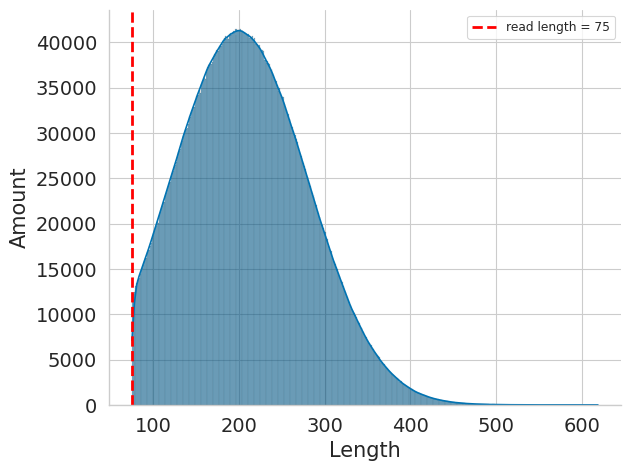

In [73]:

# Set the Seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Create the plot
ax = sns.histplot(frlengths["length"], kde=True, bins=np.unique(frlengths["length"]), edgecolor="black", palette='viridis')

# Add a red vertical line at x = 75 with a label
ax.axvline(x=75, color='red', linestyle='--', linewidth=2, label='read length = 75')

# Set titles and labels
ax.set_title("")
ax.set_xlabel("Length", fontsize=15)
ax.set_ylabel("Amount", fontsize=15)

# Set tick parameters
ax.tick_params(axis="both", which="major", labelsize=14)

# Add a legend
ax.legend()

# Adjust layout to fit everything
plt.tight_layout()

# Remove top and right spines
sns.despine()

plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/fr_dist.jpg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [2]:
df_summary = pd.read_csv("~/projects/gobi/readSimulator/output/read.mappinginfo", sep="\t")



/tmp/ipykernel_28849/3284541967.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_summary = pd.read_csv("~/projects/gobi/readSimulator/output/read.mappinginfo", sep="\t")


In [3]:
df_summary

,readid,chr,gene,transcript,t_fw_regvec,t_rw_regvec,fw_regvec,rw_regvec,fw_mut,rw_mut
0,0,9,ENSG00000241978,ENST00000495980,245-320,294-369,112918686-112918761,112918735-112918778|112930679-112930711,NaN,NaN
1,1,9,ENSG00000241978,ENST00000495980,283-358,409-484,112918724-112918778|112930679-112930700,112930751-112930826,NaN,"33,62"
2,2,9,ENSG00000241978,ENST00000495980,39-114,109-184,112811017-112811092,112811087-112811136|112918599-112918625,NaN,1
3,3,9,ENSG00000241978,ENST00000495980,10-85,268-343,112810988-112811063,112918709-112918778|112930679-112930685,22,17
4,4,9,ENSG00000241978,ENST00000495980,59-134,167-242,112811037-112811112,112918608-112918683,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7777495,7777495,19,ENSG00000104870,ENST00000221466,598-673,632-707,50017178-50017253,50017212-50017287,NaN,6
7777496,7777496,19,ENSG00000104870,ENST00000221466,281-356,568-643,50015817-50015892,50017148-50017223,NaN,"11,53"
7777497,7777497,19,ENSG00000104870,ENST00000221466,941-1016,1113-1188,50017598-50017673,50027790-50027865,23,NaN
7777498,7777498,19,ENSG00000104870,ENST00000221466,761-836,967-1042,50017341-50017391|50017468-50017493,50017624-50017699,NaN,44


In [4]:
# Set the Seaborn style and palette
fw_mut_list = df_summary["fw_mut"]
rw_mut_list = df_summary["rw_mut"]

mutations = []
mut_lengths = {}
mut_lengths[0] = 0
for elem in fw_mut_list:
	elem = str(elem)
	for comp in elem.split(","):
		if comp != 'nan':
			mutations.append(int(comp)+1)
			if (len(elem.split(",")) in mut_lengths):
				mut_lengths[len(elem.split(","))] += 1
			else:
				mut_lengths[len(elem.split(","))] = 1
		else:
			mut_lengths[0] += 1

for elem in rw_mut_list:
	elem = str(elem)
	for comp in elem.split(","):
		if comp != 'nan':
			mutations.append(int(comp)+1)
			if (len(elem.split(",")) in mut_lengths):
				mut_lengths[len(elem.split(","))] += 1
			else:
				mut_lengths[len(elem.split(","))] = 1
		else:
			mut_lengths[0] += 1

In [66]:
mut_lengths

{0: 7318447,
 1: 5545979,
 2: 4145666,
 3: 1528380,
 6: 9060,
 4: 372940,
 5: 66865,
 7: 1057,
 8: 96}

In [ ]:
mutations[1:40]

[3,
 48,
 47,
 70,
 62,
 13,
 48,
 58,
 5,
 6,
 2,
 21,
 70,
 19,
 20,
 71,
 2,
 18,
 75,
 47,
 24,
 60,
 61,
 15,
 7,
 18,
 25,
 70,
 16,
 27,
 20,
 54,
 66,
 49,
 74,
 12,
 55,
 67,
 19]

/tmp/ipykernel_4051047/3708382477.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(mutations, kde=True, bins=75, edgecolor="black", palette='viridis')
/home/malte/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


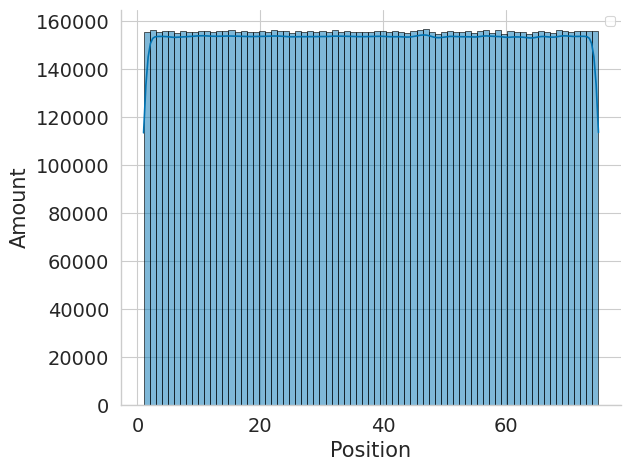

In [72]:

sns.set_style("whitegrid")
sns.set_palette("colorblind")


# Create the plot
ax = sns.histplot(mutations, kde=True, bins=75, edgecolor="black", palette='viridis')

# Set titles and labels
ax.set_title("")
ax.set_xlabel("Position", fontsize=15)
ax.set_ylabel("Amount", fontsize=15)

# Set tick parameters
ax.tick_params(axis="both", which="major", labelsize=14)

# Add a legend
ax.legend()

# Adjust layout to fit everything
plt.tight_layout()

# Remove top and right spines
sns.despine()

plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/mut_dist.jpg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [ ]:
np.unique(mutations)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

In [67]:
print(mut_lengths)

df_mut_lengths = pd.DataFrame(list(mut_lengths.items()), columns=['Category', 'Value'])
df_mut_lengths.head()

{0: 7318447, 1: 5545979, 2: 4145666, 3: 1528380, 6: 9060, 4: 372940, 5: 66865, 7: 1057, 8: 96}


,Category,Value
0,0,7318447
1,1,5545979
2,2,4145666
3,3,1528380
4,6,9060


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


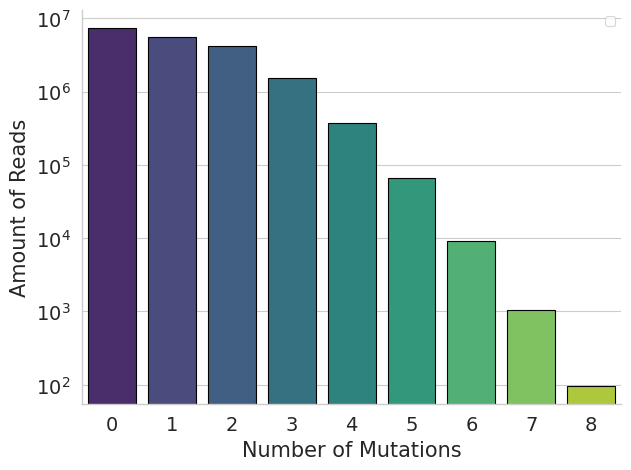

In [71]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

df_mut_lengths = pd.DataFrame(list(mut_lengths.items()), columns=['Category', 'Value'])


# Create the plot
ax = sns.barplot(data=df_mut_lengths, x="Category", y="Value" , edgecolor="black", palette='viridis')

# Set titles and labels
ax.set_title("")
ax.set_xlabel("Number of Mutations", fontsize=15)
ax.set_ylabel("Amount of Reads", fontsize=15)

# Set tick parameters
ax.tick_params(axis="both", which="major", labelsize=14)
plt.yscale('log')

# Add a legend
ax.legend()

# Adjust layout to fit everything
plt.tight_layout()

# Remove top and right spines
sns.despine()

plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/mut_amount.jpg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [ ]:
df = df_summary
# Calculate read counts for each category
total_reads = len(df)

# Count non-split reads (reads where fw_regvec and rw_regvec don't contain '|')
non_split_reads = df[~df['fw_regvec'].str.contains('\|', na=False) & 
                    ~df['rw_regvec'].str.contains('\|', na=False)].shape[0]

# Count non-split reads with no mismatches
non_split_no_mismatch = df[
    (~df['fw_regvec'].str.contains('\|', na=False) & 
        ~df['rw_regvec'].str.contains('\|', na=False)) &
    (df['fw_mut'].isna() & df['rw_mut'].isna())
].shape[0]

# Count split reads
split_reads = df[df['fw_regvec'].str.contains('\|', na=False) | 
                df['rw_regvec'].str.contains('\|', na=False)].shape[0]

# Count split reads with no mismatches
split_no_mismatch = df[
    (df['fw_regvec'].str.contains('\|', na=False) | 
        df['rw_regvec'].str.contains('\|', na=False)) &
    (df['fw_mut'].isna() & df['rw_mut'].isna())
]

count = 0
fw_regions = list(split_no_mismatch['fw_regvec'])
rw_regions = list(split_no_mismatch['rw_regvec'])
for i in range(len(fw_regions)):
    curr_fw = str(fw_regions[i])
    curr_rw = str(rw_regions[i])
    r = True
    f = True

    for fvec in curr_fw.split("|"):
        coords = fvec.split("-")
        if (int(coords[1])-int(coords[0]) < 5):
            f=False
            
    
    for rvec in curr_rw.split("|"):
        coords = rvec.split("-")
        if (int(coords[1])-int(coords[0]) < 5):
            r=False
    
    if (r and f):
        count+=1

split_no_mismatch_5bp = count

split_no_mismatch = split_no_mismatch.shape[0]

# Count split reads with no mismatches and regions ≥ 5bp
# Note: This is an approximation as we'd need to parse the actual regions
# to verify their lengths. Here we're assuming all regions meet the criteria

# Create data for plotting
categories = [
    'All Reads',
    'Non-split Reads',
    'Non-split (No Mismatches)',
    'Split Reads',
    'Split (No Mismatches)',
    'Split (No Mismatches, ≥5bp)'
]

counts = [
    total_reads,
    non_split_reads,
    non_split_no_mismatch,
    split_reads,
    split_no_mismatch,
    split_no_mismatch_5bp
]

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=counts, y=categories, palette='viridis', edgecolor='black')

ax.set_xlabel("Number of Reads", fontsize=19)

ax.tick_params(axis="both", which="major", labelsize=18)


# Add value labels on the bars
for i, v in enumerate(counts):
    plt.text(v, i, f' {v}', va='center', fontsize=17)

# Adjust layout
plt.tight_layout()
sns.despine()
plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/bar.jpg", dpi=300, bbox_inches="tight")
# plt.show()




<>:6: SyntaxWarning: invalid escape sequence '\|'
<>:7: SyntaxWarning: invalid escape sequence '\|'
<>:11: SyntaxWarning: invalid escape sequence '\|'
<>:12: SyntaxWarning: invalid escape sequence '\|'
<>:17: SyntaxWarning: invalid escape sequence '\|'
<>:18: SyntaxWarning: invalid escape sequence '\|'
<>:22: SyntaxWarning: invalid escape sequence '\|'
<>:23: SyntaxWarning: invalid escape sequence '\|'
<>:6: SyntaxWarning: invalid escape sequence '\|'
<>:7: SyntaxWarning: invalid escape sequence '\|'
<>:11: SyntaxWarning: invalid escape sequence '\|'
<>:12: SyntaxWarning: invalid escape sequence '\|'
<>:17: SyntaxWarning: invalid escape sequence '\|'
<>:18: SyntaxWarning: invalid escape sequence '\|'
<>:22: SyntaxWarning: invalid escape sequence '\|'
<>:23: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipykernel_28849/2917982617.py:6: SyntaxWarning: invalid escape sequence '\|'
  non_split_reads = df[~df['fw_regvec'].str.contains('\|', na=False) &
/tmp/ipykernel_28849/2917982617.py:

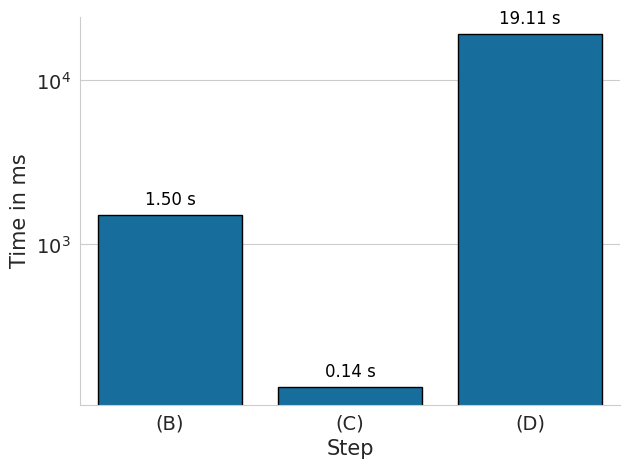

In [2]:
times = {
    "Step": ["(B)", "(C)", "(D)"],
    "Milliseconds": [1502, 135, 19108],
    "Version": ["M", "M", "M"],
}

sns.set_style("whitegrid")
sns.set_palette("colorblind")
# Convert the dictionary into a DataFrame for Seaborn
df = pd.DataFrame(times)

ax = sns.barplot(data=df, x="Step", y="Milliseconds" , edgecolor="black")

# Set titles and labels
ax.set_title("")
ax.set_xlabel("Step", fontsize=15)
ax.set_ylabel("Time in ms", fontsize=15)

# Set tick parameters
ax.tick_params(axis="both", which="major", labelsize=14)
plt.yscale('log')

for index, row in df.iterrows():
    seconds = row['Milliseconds'] / 1000  # Convert ms to seconds
    ax.text(
        index,                           # X position (bar's center)
        row['Milliseconds'] * 1.1,      # Y position (above the bar, slight offset)
        f"{seconds:.2f} s",             # Annotation text
        ha='center',                    # Center align the text horizontally
        va='bottom',                    # Bottom align the text vertically
        fontsize=12,                    # Font size for the annotation
        color='black'                   # Text color
    )

# Adjust layout to fit everything
plt.tight_layout()

# Remove top and right spines
sns.despine()

plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/times.jpg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


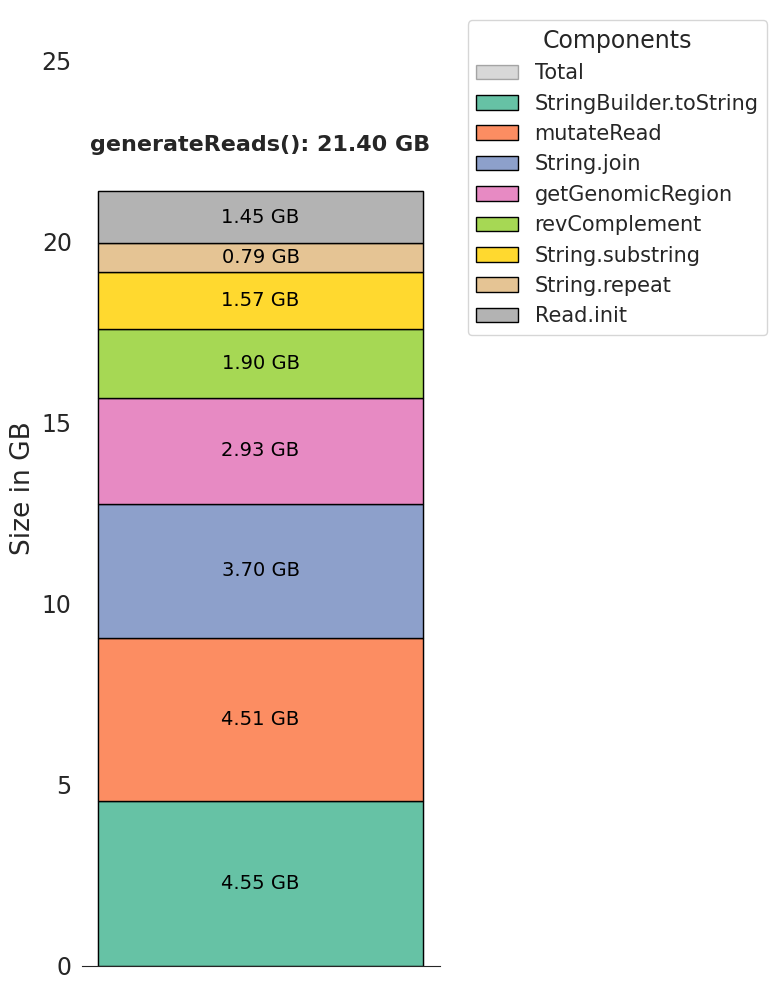

In [5]:
# sns.set_style("whitegrid")
sns.set_style("white")
sns.set_palette("deep")

data = {
    "Component": [
        "StringBuilder.toString", 
        "mutateRead", 
        "String.join", 
        "getGenomicRegion", 
        "revComplement", 
        "String.substring", 
        "String.repeat", 
        "Read.init"
    ],
    "GB": [4.55, 4.51, 3.7, 2.93, 1.9, 1.57, 0.79, 1.45],
}

total_gb = 21.4

df = pd.DataFrame(data)

df['Cumulative'] = df['GB'].cumsum()

fig, ax = plt.subplots(figsize=(8, 10))

ax.bar(
    x=["Total"],
    height=[total_gb],
    color="gray",
    alpha=0.3,
    edgecolor="black",
    label="Total",
)

bottom = 0
colors = sns.color_palette("Set2", len(df))
for i, row in df.iterrows():
    ax.bar(
        x=["Total"],
        height=[row['GB']],
        bottom=bottom,
        color=colors[i],
        edgecolor="black",
        label=row['Component'],
    )
    bottom += row['GB']

bottom = 0
for i, row in df.iterrows():
    ax.text(
        x=0,
        y=bottom + row['GB'] / 2,  
        s=f"{row['GB']:.2f} GB", 
        ha='center',
        va='center',
        color='black', 
        fontsize=14,
    )
    bottom += row['GB']

ax.text(
    x=0, 
    y=total_gb + 1, 
    s=f"generateReads(): {total_gb:.2f} GB", 
    ha='center',
    va='bottom',
    fontsize=16,
    fontweight="bold",
)

ax.set_ylim(0, total_gb + 5)
ax.set_xticks([])
ax.set_ylabel("Size in GB", fontsize=19)
ax.set_title("", fontsize=18, fontweight="bold")
ax.tick_params(axis='y', labelsize=17)

ax.legend(title="Components", title_fontsize=17, fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
sns.despine(left=True)

plt.tight_layout()
plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/generateReads_ma.jpg", dpi=300, bbox_inches="tight")


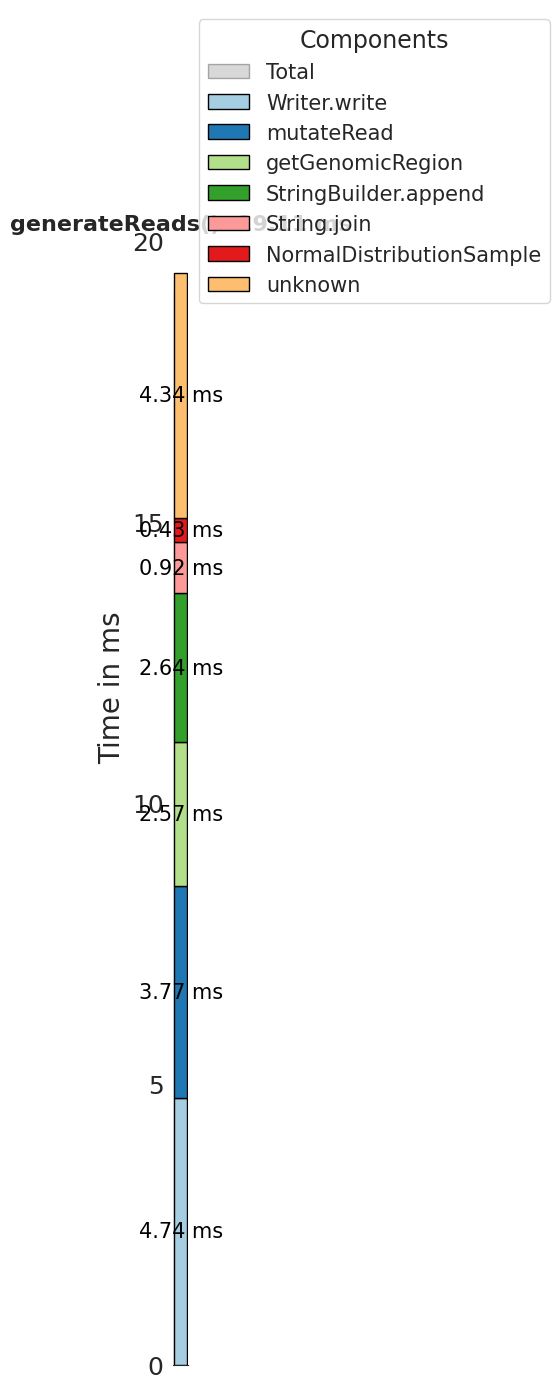

In [6]:
sns.set_style("white")
sns.set_palette("deep")

data = {
   "Component": ["Writer.write", 
                 "mutateRead", 
                 "getGenomicRegion", 
                 "StringBuilder.append", 
                 "String.join", 
                 "NormalDistributionSample", 
                 "unknown"], 
    "ms": [4.739,3.766,2.570,2.640,0.920,0.430,4.343],
}


total_ms = 19.11

df = pd.DataFrame(data)

df['Cumulative'] = df['ms'].cumsum()

fig, ax = plt.subplots(figsize=(5, 14)) # no clue why but if i save like this, the plots in report are same size???

ax.bar(
    x=["Total"],
    height=[total_ms],
    color="gray",
    alpha=0.3,
    edgecolor="black",
    label="Total",
)

bottom = 0
colors = sns.color_palette("Paired", len(df))
for i, row in df.iterrows():
    ax.bar(
        x=["Total"],
        height=[row['ms']],
        bottom=bottom,
        color=colors[i],
        edgecolor="black",
        label=row['Component'],
    )
    bottom += row['ms']

bottom = 0
for i, row in df.iterrows():
    ax.text(
        x=0,
        y=bottom + row['ms'] / 2,
        s=f"{row['ms']:.2f} ms",
        ha='center',
        va='center',
        color='black',
        fontsize=15,
    )
    bottom += row['ms']

ax.text(
    x=0,
    y=total_ms + 1,
    s=f"generateReads(): {total_ms:.2f} ms",
    ha='center',
    va='bottom',
    fontsize=16,
    fontweight="bold",
)

ax.set_ylim(0, total_ms + 5)
ax.set_xticks([])
ax.set_ylabel("Time in ms", fontsize=20)
ax.set_title("", fontsize=18, fontweight="bold")
ax.tick_params(axis='y', labelsize=18)

ax.legend(title="Components", title_fontsize=17, fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True)

plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/generateReads_times.jpg", dpi=300, bbox_inches="tight")
plt.tight_layout()
